# 데이터 마이닝 기말 과제
## 비즈니스 애널리틱스 과정 권혁주

## 문제 1
Suppose we have a data set with five predictors, X1 = GPA, X2 = IQ, X3 = Gender (1for Female and 0 for Male), X4 = Interaction between GPA and IQ, and X5 = Interaction between GPA and Gender. The response is starting salary after graduation (in thousands of dollars).  Suppose we use least squares to fit the model, and get βˆ0 = 50, βˆ1 = 20, βˆ2 = 0.07, βˆ3 = 35, βˆ4 = 0.01, βˆ5 = −10.
### 1. Which answer is correct, and why?
(a) For a fixed value of IQ and GPA, males earn more on average than females.

(b) For a fixed value of IQ and GPA, females earn more on average than males.

(c) For a fixed value of IQ and GPA, males earn more on average than females provided that the GPA is high enough.

(d) For a fixed value of IQ and GPA, females earn more on average than males provided that the GPA is high enough.

ANSWER  : GPA가 충분히 높다면 남성이 여성보다 더 많이 범 (d)

The model : Y = 50+20(GPA)+0.07(IQ)+35(Gender)+0.01(GPA×IQ)−10(GPA×Gender)

Male (Gender = 0) : Y = 50+20(GPA)+0.07(IQ)+0.01(GPA×IQ)

Female (Gender = 0) : Y = 50+20(GPA)+0.07(IQ)+35+0.01(GPA×IQ)−10(GPA)



### 2. Predict the salary of a female with IQ of 110 and a GPA of 4.0.

ANSWER : Y =50+20∗4+0.07∗110+35+0.01(4×110)−10∗(4)=137.1

### 3. True or false: Since the coefficient for the GPA/IQ interaction term is very small, there is very little evidence of an interaction effect. Justify your answer

ANSWER : FALSE. 계수에 대한 P-value는 유의수준 ( 0.5)에 따라 결정됨

## 문제 2
mpg 자료를 이용하여 다음을 코딩하라.(결측값은 제거할 것). 
(조건: 반응 변수: mpg01, 예측 변수: cylinders, weight, displacement, horsepower로 지정)


### 1. mpg의 값이 중앙값보다 크면 1로, 아니면 0으로 할당하는 이항 변수 자료를 만들어라.그리고 Auto 자료에 mpg01 이라는 변수명으로 추가하라.

In [216]:
# mpg01 변수 생성
library(ISLR)
library(MASS)
library(class)

Auto$mpg01 = Auto$mpg
median = median(Auto$mpg)
Auto[Auto$mpg01 <= median,10] = 0 
Auto[Auto$mpg01 > median,10] = 1 

### 2. 선형 판별 분석(LDA)을 수행하라. 이때, 자료를 짝수년을 기준으로 훈련 자료와 시험 자료로 분리하고 전체 오차율을 구하여라.

In [217]:
# 훈련,시험 데이터 생성 & 선형판별 분석
train = (Auto$year%%2 == 0) # 훈련 데이터 생성 
test = Auto[!train,] # 시험 데이터 생성

lda.fit = lda(mpg01~cylinders+weight+displacement+horsepower,data = Auto,family = binomial,subset = train) 
lda.pred = predict(lda.fit,test)$class
table(lda.pred,test$mpg01) # 혼동 행렬
mean(lda.pred == test$mpg01) # 전체 오차율

        
lda.pred  0  1
       0 86  9
       1 14 73

[1] 0.8736264

### 3. 이차 판별 분석(QDA)을 수행하라. 그리고 혼동 행렬 (confusion matrix)을 만들고 전체 오차율을 구하여라.


In [218]:
# 이차 판별 분석
qda.fit = qda(mpg01~cylinders+weight+displacement+horsepower,data = Auto,family = binomial,subset = train)
qda.pred = predict(qda.fit,test)$class
table(qda.pred,test$mpg01) # 혼동 행렬
mean(qda.pred == test$mpg01) # 전체 오차율

        
qda.pred  0  1
       0 89 13
       1 11 69

[1] 0.8681319

### 4. 다중 로지스틱 회귀 분석을 수행하라. 그리고 시험자료에서 예측한 값과 실제 값을 비 교하고 전체 오차율을 구하여라. 


In [219]:
# 다중 로지스틱 회귀

glm.fit = glm(mpg01~cylinders+weight+displacement+horsepower,data = Auto,family = binomial,subset = train)
glm.probs = predict(glm.fit,test,type = 'response')
glm.pred = rep('0',length(test$mpg01))
glm.pred[glm.probs > 0.5] = '1'
table(glm.pred,test$mpg01) # 혼동 행렬
mean(glm.pred == test$mpg01) # 전체 오차율

        
glm.pred  0  1
       0 89 11
       1 11 71

[1] 0.8791209

### 5. 최근접이웃방법(KNN)을 수행하라. 그리고 K = 1, K = 10, K = 100일 때, 각 전체 오차율을 구하여라.

In [220]:
# 동일한 결과값을 생산하기 위해 set.seed(1)을 설정
set.seed(1)

In [221]:
# 데이터 세팅 & k = 1 인 최근접 이웃법
Auto.train = Auto[train,c(2,3,4,5)] # 설명변수를 포함하는 훈련 데이터 
Auto.test = Auto[!train,c(2,3,4,5)] # 설명변수를 포함하는 시험 데이터
knn.pred = knn(Auto.train,Auto.test,Auto[train,10],k=1)  # k = 1인 knn
table.1 <- table(knn.pred,test$mpg01) # 혼동 행렬
table.1

        
knn.pred  0  1
       0 83 11
       1 17 71

In [222]:
(table.1[1.1]+table.1[2,2])/sum(table.1) # 전체 오차율

[1] 0.8461538

In [223]:
# k = 10 인 최근접 이웃법
knn.pred = knn(Auto.train,Auto.test,Auto[train,10],k=10) # k = 10인 knn
table.10 <- table(knn.pred,test$mpg01) # 혼동 행렬
table.10

        
knn.pred  0  1
       0 77  7
       1 23 75

In [224]:
(table.10[1.1]+table.1[2,2])/sum(table.10) # 전체 오차율

[1] 0.8131868

In [225]:
# k = 100 인 최근접 이웃법
knn.pred = knn(Auto.train,Auto.test,Auto[train,10],k=100) # k = 100인 knn
table.100 <- table(knn.pred,test$mpg01) # 혼동 행렬
table.100

        
knn.pred  0  1
       0 81  7
       1 19 75

In [226]:
(table.100[1.1]+table.1[2,2])/sum(table.100) # 전체 오차율

[1] 0.8351648

## 문제 3
#### 강의 홈에 제공된 'data.xlsx'에 대하여 'ideo_self'예측하는 모형을 구축하고 'ideo_self' 관측되지 않은 자료 ('NA'자료)에 대한 예측을 시행하여라. 예측 모형을 구축함에 잇어 그 과정을 설명함으로서 제안된 예측모형의 타당성을 이야기하여야 한다.

### 데이터 세팅
제공된 data1.xlsx 파일을 train set(1번 ~ 900번 관측치) 과 test set(901번 ~ 1055번 관측치)으로 나눔 

train set은 data1.csv로 저장, test setd은 test1.csv로 저장

In [234]:
# library & data 세팅
setwd('C:/Users/User/Desktop')
library(tree)
library(randomForest)
library(caret)
library(gbm)
data1 <- read.csv('data1.csv',header = TRUE) # 나눈 train set을 불러옴

### 데이터 전처리

In [235]:
data1 <- data1[-585,] # 모든 변수 값이 NA인 관측값 삭제

data1$id <- as.factor(data1$id) # int -> factor로 변수 타입 변경
data1$sex <- as.factor(data1$sex) # int -> factor로 변수 타입 변경
data1$area <- as.factor(data1$area) # int -> factor로 변수 타입 변경


### 탐색적 분석
설명 변수(k2 ~ k14)에는 다수의  NA값들이 존재  (각각 관측치의 8~ 10% 정도) -> 파생변수 생성 (k0 : 관측치별 k2~ k14 변수 응답의 평균)

설명 변수(k2 ~ k14)와 반응변수(ideo_self)사이의 관계 파악  -> 일부 구간에서만 선형 관계 확인

In [236]:
# 탐색적 분석
summary(data1)
colSums(is.na(data1))

# 파생변수 ko 생성
data1$k0 <- apply(data1[,c(9:18)],1,mean,na.rm = T)

# ideo_self와 k2 ~ k14 변수 간의 선형 관계
aggregate(formula = k2 ~ideo_self,data = data1,FUN = mean)
aggregate(formula = k3 ~ideo_self,data = data1,FUN = mean) 
#aggregate(formula = k4 ~ideo_self,data = data1,FUN = mean) 
#aggregate(formula = k6 ~ideo_self,data = data1,FUN = mean) 
#aggregate(formula = k7 ~ideo_self,data = data1,FUN = mean) 
#aggregate(formula = k8 ~ideo_self,data = data1,FUN = mean) 
#aggregate(formula = k10 ~ideo_self,data = data1,FUN = mean) 
#aggregate(formula = k12 ~ideo_self,data = data1,FUN = mean) 
#aggregate(formula = k13 ~ideo_self,data = data1,FUN = mean) 
#aggregate(formula = k14 ~ideo_self,data = data1,FUN = mean) 

       id      sex         birth           age1            age      
 1      :  1   1:518   Min.   :1938   Min.   :19.00   Min.   :2.00  
 3      :  1   2:381   1st Qu.:1961   1st Qu.:33.00   1st Qu.:3.00  
 4      :  1           Median :1970   Median :46.00   Median :4.00  
 6      :  1           Mean   :1972   Mean   :44.22   Mean   :4.01  
 7      :  1           3rd Qu.:1983   3rd Qu.:55.00   3rd Qu.:5.00  
 8      :  1           Max.   :1997   Max.   :78.00   Max.   :6.00  
 (Other):893                                                        
      area          edu            income             k2              k3       
 1      :261   Min.   :1.000   Min.   : 1.000   Min.   :0.000   Min.   :1.000  
 8      :221   1st Qu.:2.000   1st Qu.: 1.000   1st Qu.:0.000   1st Qu.:1.000  
 2      : 72   Median :3.000   Median : 1.000   Median :1.000   Median :1.000  
 4      : 71   Mean   :3.135   Mean   : 1.824   Mean   :0.662   Mean   :1.488  
 6      : 39   3rd Qu.:4.000   3rd Qu.: 1.000   

id       sex     birth      age1       age      area       edu    income 
        0         0         0         0         0         0         0         0 
       k2        k3        k4        k6        k7        k8       k10       k12 
      186       167       173       143       228       106       230        83 
      k13       k14 ideo_self 
       68        94         0

ideo_self,k2
0,0.5416667
1,0.2222222
2,0.2777778
3,0.3333333
4,0.4729730
5,0.6974359
6,0.8354430
7,0.8684211
8,0.8548387
9,1.0000000


ideo_self,k3
0,1.640000
1,1.777778
2,1.694444
3,1.694118
4,1.678571
5,1.480769
6,1.421053
7,1.388889
8,1.169492
9,1.095238


#### 탐색적 분석 요약 : 
반응 변수가 0 ~ 10 등급이지만 등급 간 순서가 존재하기 때문에 회귀 모형 적용 가능

또한 반응 변수와 설명 변수간의 선형선이 존재하기 때문에 부스팅 기법의 조율 파라미터를 활용 적합한 모델을 선택

### Train & Validation set 생성

In [237]:
set.seed(1)
train = sample(1:nrow(data1),450) # train 생성
ideo_self.test = data1[-train,19] # validation 생성

### Boosting 모델 활용 예측

In [238]:
boost.1 = gbm(ideo_self~.-id-age-birth,data1[train,],distribution = 'gaussian',n.trees = 5000,interaction.depth = 1 ,shrinkage = 0.0005)
yhat.boost = predict(boost.1,newdata = data1[-train,],n.trees = 5000)

In [239]:
confusionMatrix(round(yhat.boost),ideo_self.test)
mean((yhat.boost - ideo_self.test)^2)

Warning message in levels(reference) != levels(data):
"두 객체의 길이가 서로 배수관계에 있지 않습니다"Warning message in confusionMatrix.default(round(yhat.boost), ideo_self.test):
"Levels are not in the same order for reference and data. Refactoring data to match."

Confusion Matrix and Statistics

          Reference
Prediction  0  1  2  3  4  5  6  7  8  9 10
        0   0  0  0  0  0  0  0  0  0  0  0
        1   0  0  0  0  0  0  0  0  0  0  0
        2   0  0  0  0  0  0  0  0  0  0  0
        3   0  0  0  0  0  0  0  0  0  0  0
        4   3  3  7 18 14 21  5  1  1  0  0
        5  12  7 11 31 29 87 15 13  4  0  4
        6   0  1  1  8  6 25 28 11  7  3  8
        7   2  0  1  0  4 11  8 14 14  3  8
        8   0  0  0  0  0  0  0  0  0  0  0
        9   0  0  0  0  0  0  0  0  0  0  0
        10  0  0  0  0  0  0  0  0  0  0  0

Overall Statistics
                                          
               Accuracy : 0.3185          
                 95% CI : (0.2756, 0.3638)
    No Information Rate : 0.3207          
    P-Value [Acc > NIR] : 0.5579          
                                          
                  Kappa : 0.1361          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 0 Cl

[1] 3.770201

### test set에 적용

In [241]:
# test set 전처리
test.1 = read.csv('data1_test.csv',header = TRUE)
test.1$id = as.factor(test.1$id) # int -> factor로 변수 타입 변경
test.1$sex = as.factor(test.1$sex) # int -> factor로 변수 타입 변경
test.1$area = as.factor(test.1$area) # int -> factor로 변수 타입 변경
test.1$k0 = apply(test.1[,c(9:18)],1,mean,na.rm = T)

In [242]:
# 예측 후 데이터 저장
test.yhat = predict(boost.1,newdata = test.1,n.trees = 5000)
answer = round(test.yhat)
test.1$answer = answer
write.csv(test.1,'data1_answer.csv')

## 문제 4
#### 강의 홈에 제공된 'data2.xlsx'을 이용하여 의원 들의 군집을 파악하여 보아라. 문제 3과 같이 군집을 찾아가는 과정에 대한 설명을 제시함으로서 분석의 타탕성을 이야기 하여야 한다.

### 데이터 세팅
데이터를 불러화 행렬(matrix)식으로 변환

In [209]:
data2 <- read.csv('data2.csv') # 데이터 불러오기
dim(data2) # 141*142행렬이므로 변수명에 해당되는 첫 열을 분리

name <- data2[,1] # 첫 열을 name으로 지정
data2 <- data2[,-1]
data2 <- as.matrix(data2) # data.frame을 matrix로 변환
rownames(data2) <- name # rownames 입력

[1] 141 142

In [210]:
# 변수명을 정당으로 갖는 matrix 생성
party <- read.csv('party.csv') # 데이터 불러오기
party_names <- party$party
data_party <- data2
rownames(data_party) <- party_names
colnames(data_party) <- party_names


### 클러스터링 방법 선택
계층적 클러스터링과 K-mean 클러스터링 중 데이터 특성(변수*변수 matrix형태)에 따라 계층적 클러스터링으로 결정

비유사성 측도를 선택하기 위해' 평균','완전' 연결법을 활용 (가장 많이 활용)

필요에 따라 scaling 진행


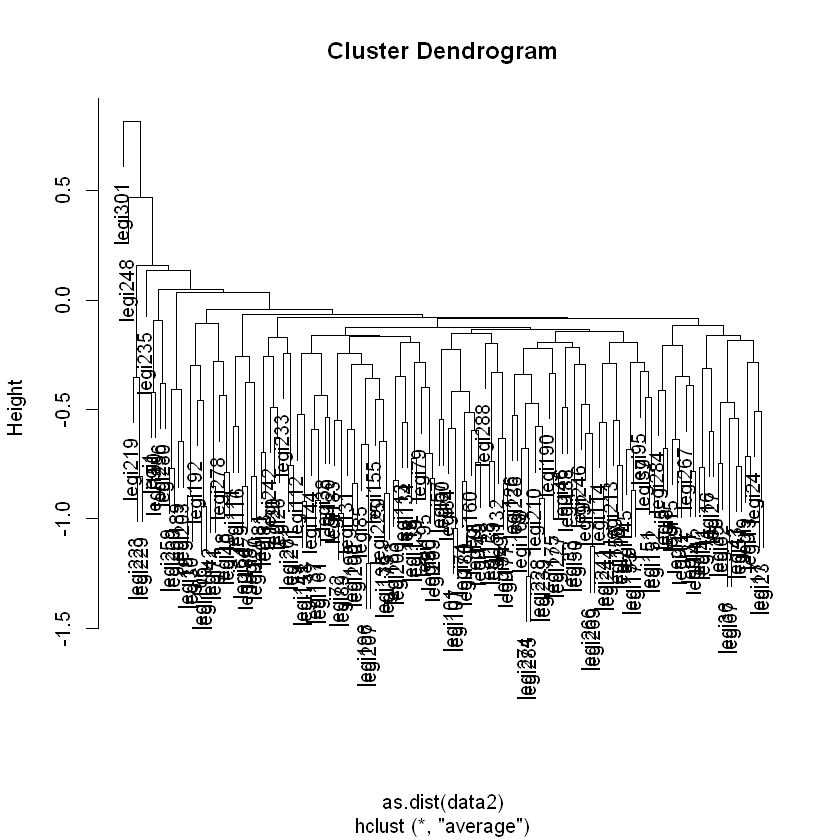

In [244]:
# scaling
data2 <- scale(data2,center = TRUE,scale = TRUE)


# 평균 거리 활용 군집 분석
plot(hclust(as.dist(data2),method = 'average'))

#### 평균거리 클러스터링 분석 요약 : 
데이터간의 법안 발의 수를 거리로 환산하기 때문에 함께 함께한 법안 발의가 0이면 같은 클러스터로 묶임

height를 기준으로 군집화하기 부적합한 클러스터링

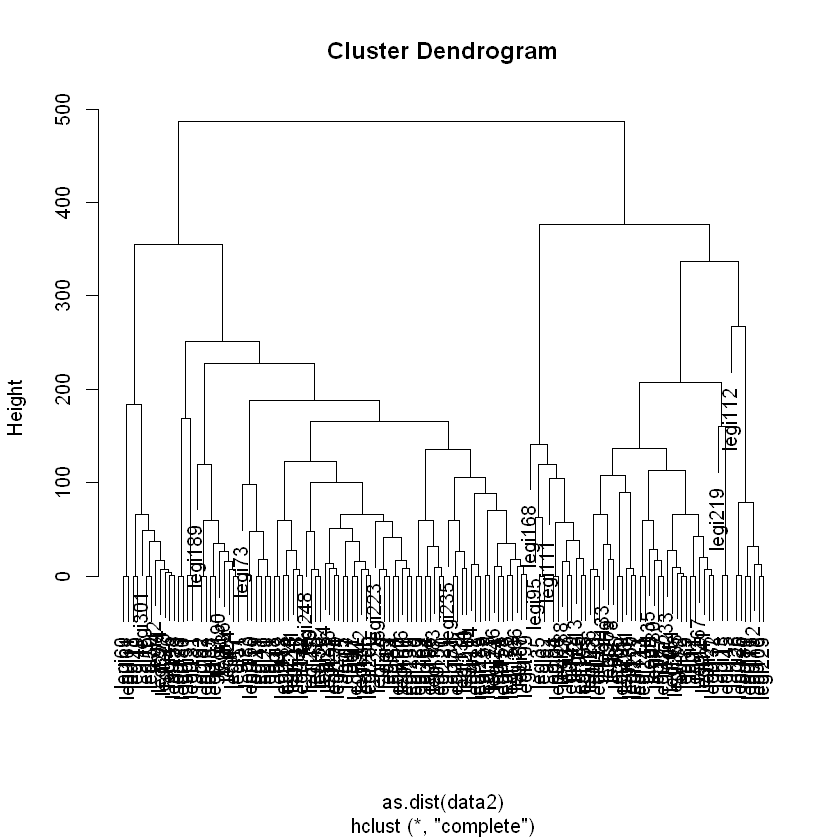

In [213]:
# 완전 거리 활용 군집 분석
plot(hclust(as.dist(data2),method = 'complete'))

### 완전거리 클러스터링 분석 요약 : 
데이터간의 법안 발의 수를 거리로 환산하기 때문에 함께 함께한 법안 발의가 0이면 같은 클러스터로 묶임
height= 200를 기준으로 8개의 클러스터링으로 구분됨

### 추가적인 클러스터링
상관 기반 거리를 활용해 함께 법안을 발의한 수가 높으면 상관관계가 높아 이를 기준으로 클러스터링 

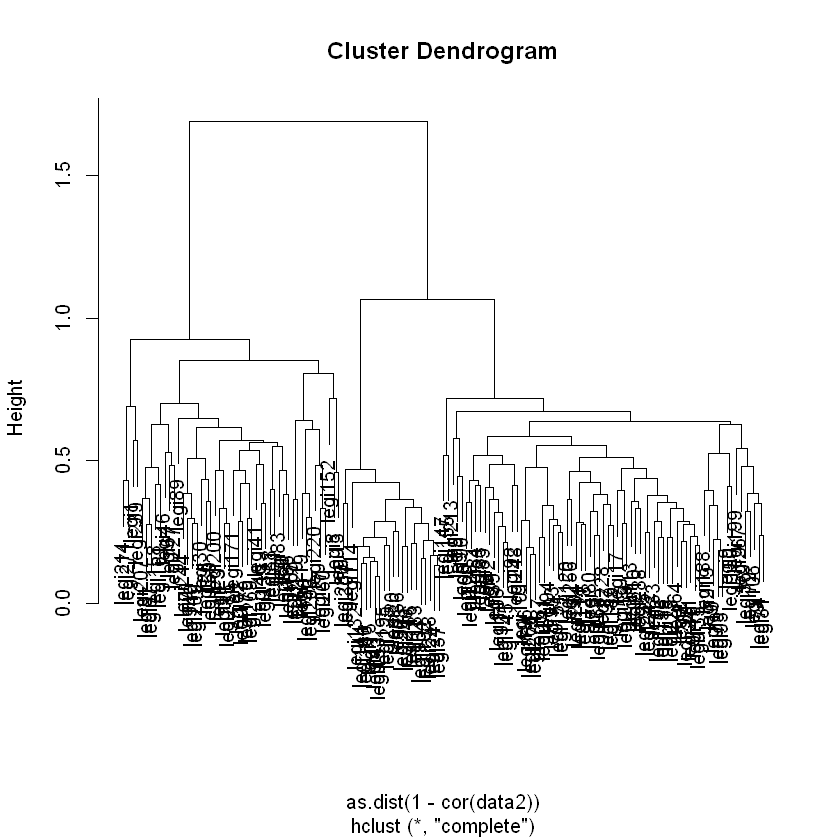

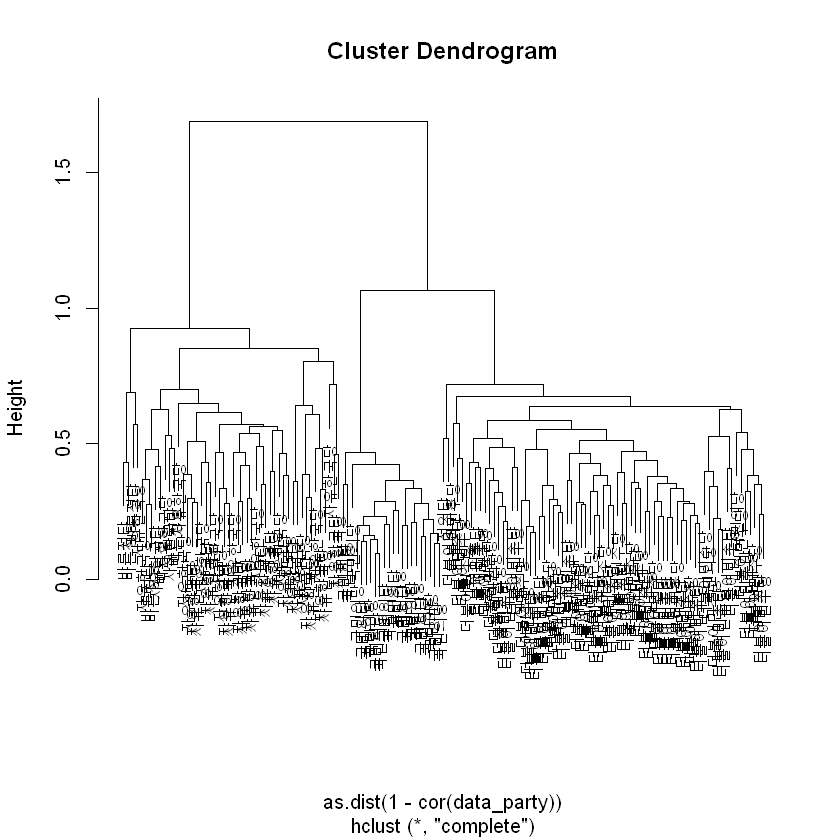

In [243]:
plot(hclust(as.dist(1 - cor(data2))))
plot(hclust(as.dist(1 - cor(data_party))))

#### 상관계수 기반 클러스터링 분석 요약 : 
법안 발의한 수가 많은 의원을 중심으로 클러스터링 됨

이를 정당의 이름을 기준으로 보았을 때, 각 정당 끼리 묶이는 경향을 보임

크게 3개의 클러스터링으로 분류되는데, '자유한국당 - 바른정당' 클러스터링, '국민의당' 클러스터링, '더불어민주당-정의당' 클러스터링으로 분류
